# Data Preparation for Machine Learning 

## Understand Your Machine Learning Data With Descriptive Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import numpy as np
from pandas.plotting import scatter_matrix
import sklearn as sk

In [2]:
wells = pd.read_csv("Desktop/REX LOGS/Petrophysics_Preprocessing.csv", header=0)

### Peek at Your Data
There is no substitute for looking at the raw data.

Looking at the raw data can reveal insights that you cannot get any other way. It can also plant seeds that may later grow into ideas on how to better preprocess and handle the data for machine learning tasks.

You can review the first 20 rows of your data using the head() function on the Pandas DataFrame.

In [3]:
wells.head(20)

,GR,LLD,RHOB,NPHI,DEPTH,WELL
0,77.3045,1.4997,2.2656,0.0723,7799.0,AKASO-001
1,89.7565,1.4191,2.2873,0.4000,8656.5,AKASO-001
2,95.4250,1.3932,2.2981,0.4000,8657.0,AKASO-001
3,98.9561,1.4191,2.3141,0.4000,8657.5,AKASO-001
4,99.6995,1.3552,2.3143,0.4000,8658.0,AKASO-001
5,99.5137,1.4322,2.3067,0.4000,8658.5,AKASO-001
6,95.1462,1.5560,2.2973,0.4000,8659.0,AKASO-001
7,95.1462,1.5704,2.2839,0.4000,8659.5,AKASO-001
8,96.1684,1.5849,2.2852,0.4000,8660.0,AKASO-001
9,92.9160,1.3932,2.2810,0.4000,8660.5,AKASO-001


### Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.

Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.
You can review the shape and size of your dataset by printing the shape property on the Pandas DataFrame.

In [4]:
wells.shape

(69979, 6)

### Data Type For Each Attribute
The type of each attribute is important.

Strings may need to be converted to floating point values or integers to represent categorical or ordinal values.

You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the DataFrame to characterize each attribute using the dtypes property

In [5]:
wells.dtypes

GR       float64
LLD      float64
RHOB     float64
NPHI     float64
DEPTH    float64
WELL      object
dtype: object

In [6]:
wells.describe()

,GR,LLD,RHOB,NPHI,DEPTH
count,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000
mean,68.090474,4.214338,2.224551,0.308411,8880.815359
std,26.485363,4.797772,0.110522,0.078729,1992.052869
min,-14.785700,0.065100,1.847700,0.017900,3449.500000
25%,41.632400,1.418250,2.145700,0.250400,7401.000000
50%,69.897700,1.995600,2.210700,0.293800,8813.500000
75%,92.294100,4.718450,2.304300,0.374000,10130.000000
max,165.420700,23.206300,2.621800,0.600600,14920.000000


### Correlation Between Attributes
Correlation refers to the relationship between two variables and how they may or may not change together.

The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all.

Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. As such, it is a good idea to review all of the pair-wise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [7]:
wells2 = wells.drop(['WELL'], axis=1)
correlations = wells2.corr(method='pearson')
print(correlations)

             GR       LLD      RHOB      NPHI     DEPTH
GR     1.000000 -0.280384  0.478483  0.411005  0.192647
LLD   -0.280384  1.000000 -0.203666 -0.063239 -0.426266
RHOB   0.478483 -0.203666  1.000000 -0.121606  0.407514
NPHI   0.411005 -0.063239 -0.121606  1.000000 -0.331497
DEPTH  0.192647 -0.426266  0.407514 -0.331497  1.000000


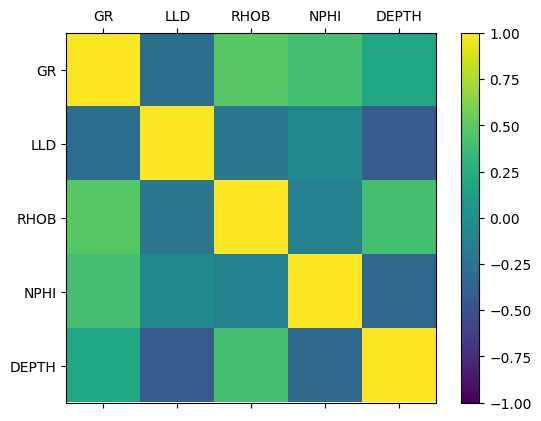

In [8]:
# plot correlation matrix
names = ['GR', 'LLD', 'RHOB', 'NPHI', 'DEPTH']
correlations = wells2.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Scatterplot Matrix
A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. Drawing all these scatterplots together is called a scatterplot matrix.

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

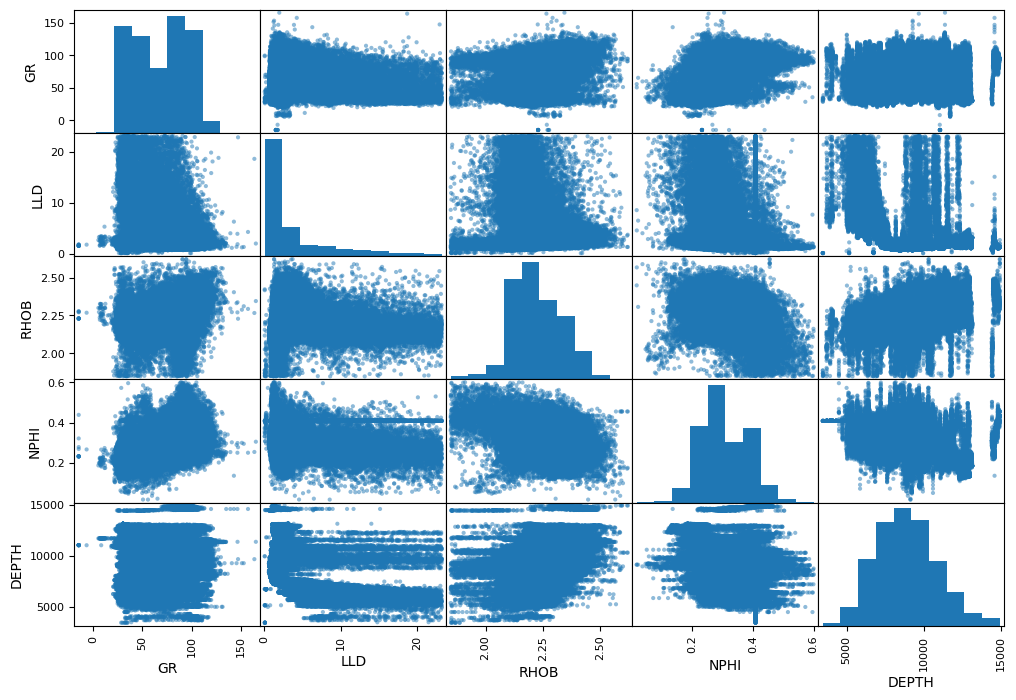

In [9]:
scatter_matrix(wells2, figsize=(12, 8))
plt.show()

<Axes: xlabel='NPHI', ylabel='RHOB'>

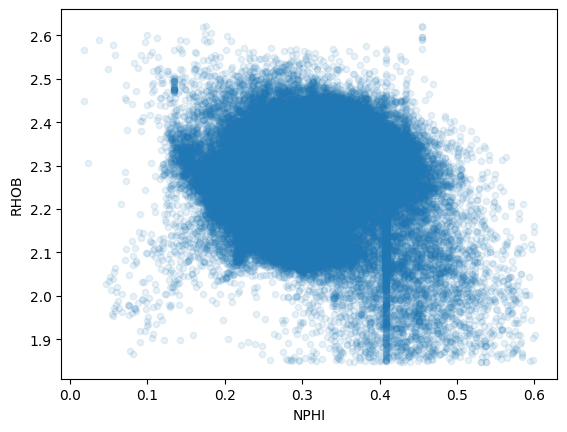

In [10]:
wells.plot(kind="scatter", x="NPHI", y="RHOB",
 alpha=0.1)

### Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.

Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models.

You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [11]:
skew = wells2.skew()
skew

GR      -0.027044
LLD      1.990455
RHOB     0.091342
NPHI     0.326211
DEPTH    0.351462
dtype: float64

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
When a distribution has zero skew, it is symmetrical. Its left and right sides are mirror images. Normal distributions have zero skew, but they’re not the only distributions with zero skew. 

### Tips To Remember
This section gives you some tips to remember when reviewing your data using summary statistics.

Review the numbers. Generating the summary statistics is not enough. Take a moment to pause, read and really think about the numbers you are seeing.
Ask why. Review your numbers and ask a lot of questions. How and why are you seeing specific numbers. Think about how the numbers relate to the problem domain in general and specific entities that observations relate to.
Write down ideas. Write down your observations and ideas. Keep a small text file or note pad and jot down all of the ideas for how variables may relate, for what numbers mean, and ideas for techniques to try later. The things you write down now while the data is fresh will be very valuable later when you are trying to think up new things to try.

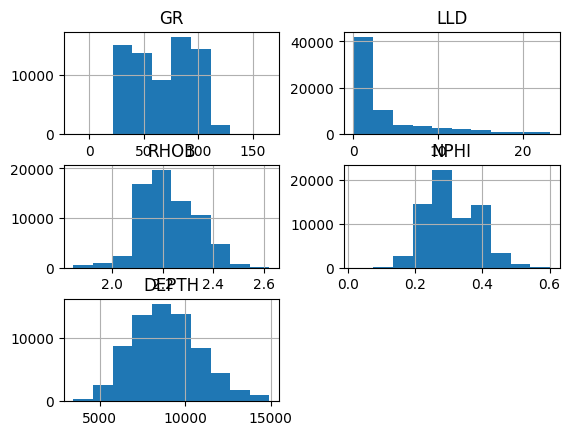

In [12]:
wells.hist()
plt.show()

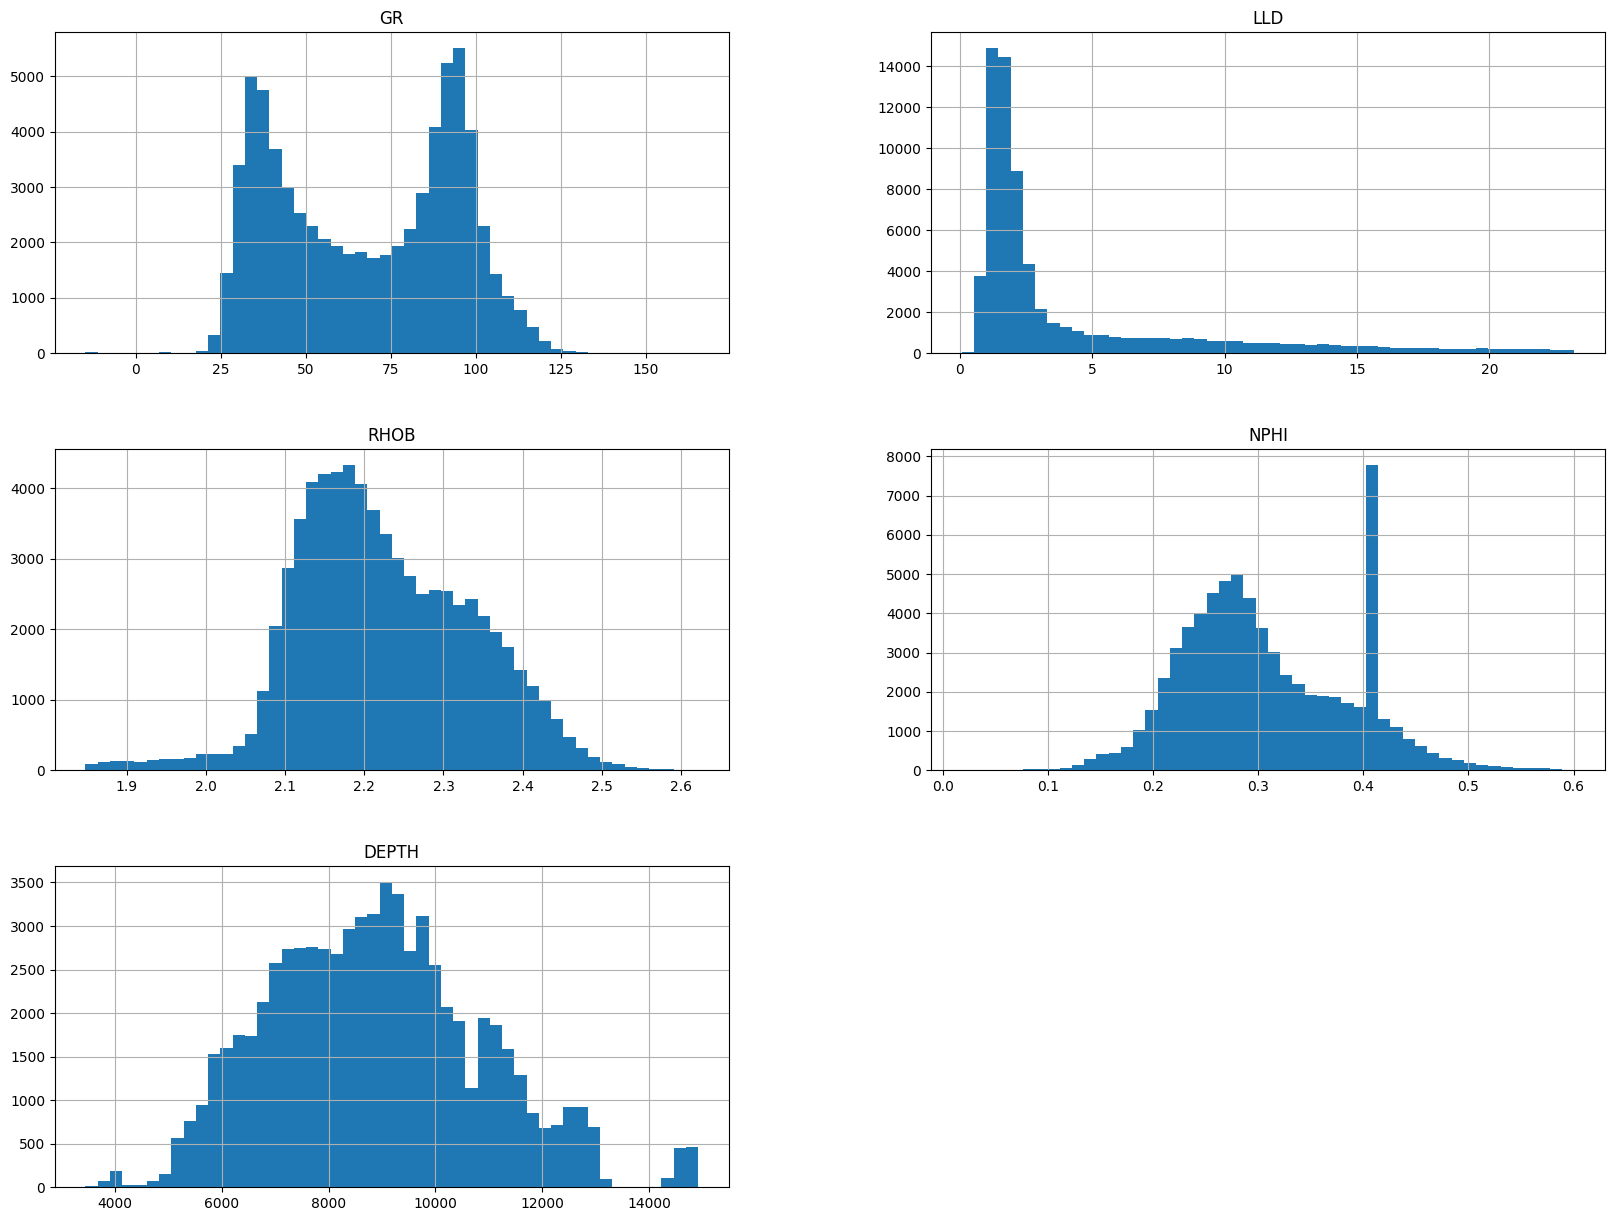

In [13]:
 %matplotlib inline   
 wells.hist(bins=50, figsize=(20,15))
 plt.show()

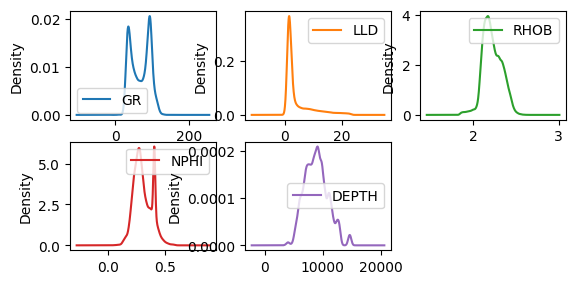

In [14]:
wells.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [15]:
wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69979 entries, 0 to 69978
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GR      69979 non-null  float64
 1   LLD     69979 non-null  float64
 2   RHOB    69979 non-null  float64
 3   NPHI    69979 non-null  float64
 4   DEPTH   69979 non-null  float64
 5   WELL    69979 non-null  object 
dtypes: float64(5), object(1)
memory usage: 3.2+ MB


## Create Training, Testing and Validation Datasets
Our dataset should have 9 wells within it. We can confirm this by calling upon the unique() function

As we are using measurements taken from multiple wells, one way to split our data into training and testing is to set aside a single well (blind test well) which will be used to see how our model performs on unseen data.

It may sound strange to voluntarily set aside part of the data at this stage. After all,
 you have only taken a quick glance at the data, and surely you should learn a whole
 lot more about it before you decide what algorithms to use, right? This is true, but
 your brain is an amazing pattern detection system, which means that it is highly
 prone to overfitting: if you look at the test set, you may stumble upon some seemingly
 interesting pattern in the test data that leads you to select a particular kind of
 Machine Learning model. When you estimate the generalization error using the test
 set, your estimate will be too optimistic and you will launch a system that will not
 perform as well as expected. This is called data snooping bias.
 Creating a test set is theoretically quite simple: just pick some instances randomly,
 typically 20% of the dataset (or less if your dataset is very large), and set them aside

In [16]:
wells['WELL'].unique()

array(['AKASO-001', 'AKASO-013', 'AKASO-002', 'AKASO-004', 'AKASO-007',
       'AKASO-008', 'AKASO-009', 'AKASO-010', 'AKASO-012-ST1'],
      dtype=object)

In [17]:
wells['WELL'].value_counts()

WELL
AKASO-002        12604
AKASO-004        11620
AKASO-012-ST1    10381
AKASO-008        10378
AKASO-009         9034
AKASO-013         8186
AKASO-010         4939
AKASO-007         2809
AKASO-001           28
Name: count, dtype: int64

In [18]:
# Training Wells
training_wells = ['AKASO-001', 'AKASO-002', 'AKASO-004', 'AKASO-007',
       'AKASO-008', 'AKASO-009', 'AKASO-010', 'AKASO-012-ST1']

# Test Well
test_well = ['AKASO-013']

In [19]:
# Extract the data from the main dataframe using the well lists above
train_val_wells = wells[wells['WELL'].isin(training_wells)].copy()
test_well = wells[wells['WELL'].isin(test_well)].copy()

In [20]:
train_val_wells.describe()

,GR,LLD,RHOB,NPHI,DEPTH
count,61793.000000,61793.000000,61793.000000,61793.000000,61793.000000
mean,68.218698,4.089337,2.229449,0.309964,9035.794176
std,26.790938,4.720426,0.110621,0.080680,2018.867467
min,-14.785700,0.065100,1.847700,0.017900,3449.500000
25%,41.425300,1.402200,2.149400,0.249000,7546.000000
50%,70.314000,1.958400,2.215900,0.295200,8985.500000
75%,92.523200,4.289200,2.311100,0.380900,10351.500000
max,165.420700,23.206300,2.621800,0.600600,14920.000000


In [21]:
test_well.describe()

,GR,LLD,RHOB,NPHI,DEPTH
count,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000
mean,67.122555,5.157926,2.187577,0.296688,7710.939226
std,24.033207,5.250793,0.102490,0.060786,1267.558524
min,27.435200,0.475700,1.847900,0.072700,4996.000000
25%,42.758450,1.586300,2.122425,0.258925,6673.625000
50%,67.846100,2.305900,2.176400,0.288800,7697.250000
75%,90.714325,7.472525,2.252175,0.322650,8758.875000
max,124.490300,23.190300,2.532700,0.572600,10036.000000


 ## Prepare the Data for Machine Learning Algorithms
 It’s time to prepare the data for your Machine Learning algorithms. Instead of just
 doing this manually, you should write functions to do that, for several good reasons:
 • This will allow you to reproduce these transformations easily on any dataset (e.g.,
 the next time you get a fresh dataset).
 • You will gradually build a library of transformation functions that you can reuse
 in future projects.
 • You can use these functions in your live system to transform the new data before
 feeding it to your algorithms.
 • This will make it possible for you to easily try various transformations and see
 which combination of transformations works best.
 
  But first let’s revert to a clean training set (by copying train_val_wells once again),
 and let’s separate the predictors and the labels since we don’t necessarily want to apply
 the same transformations to the predictors and the target values (note that drop() 
creates a copy of the data and does not affect train_val_wells)

In [30]:
 X_train = train_val_wells.drop(["DEPTH", "RHOB", "WELL"], axis=1)
 y_train = train_val_wells["RHOB"].copy()

In [31]:
y_train

0        2.2656
1        2.2873
2        2.2981
3        2.3141
4        2.3143
          ...  
69974    2.3306
69975    2.3369
69976    2.3327
69977    2.3367
69978    2.3447
Name: RHOB, Length: 61793, dtype: float64

In [24]:
X_train

,GR,LLD,NPHI
0,77.3045,1.4997,0.0723
1,89.7565,1.4191,0.4000
2,95.4250,1.3932,0.4000
3,98.9561,1.4191,0.4000
4,99.6995,1.3552,0.4000
...,...,...,...
69974,129.5191,1.7509,0.3163
69975,133.0938,1.6740,0.3034
69976,128.3808,1.6653,0.3037
69977,146.7920,1.8356,0.2989


 ## Feature Scaling
 One of the most important transformations you need to apply to your data is feature
 scaling. With few exceptions, Machine Learning algorithms don’t perform well when
 the input numerical attributes have very different scales. This is the case for the hous
ing data: the total number of rooms ranges from about 6 to 39,320, while the median
 incomes only range from 0 to 15. Note that scaling the target values is generally not
 required.
 There are two common ways to get all attributes to have the same scale: min-max
 scaling and standardization.
 Min-max scaling (many people call this normalization) is quite simple: values are
 shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract
ing the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter
 that lets you change the range if you don’t want 0–1 for some reason.
 Standardization is quite different: first it subtracts the mean value (so standardized
 values always have a zero mean), and then it divides by the standard deviation so that
 the resulting distribution has unit variance. Unlike min-max scaling, standardization
 does not bound values to a specific range, which may be a problem for some algo
rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How
ever, standardization is much less affected by outliers. For example, suppose a district
 had a median income equal to 100 (by mistake). Min-max scaling would then crush
 all the other values from 0–15 down to 0–0.15, whereas standardization would not be
 much affected. Scikit-Learn provides a transformer called StandardScaler for stand
ardization.

As with all the transformations, it is important to fit the scalers to
 the training data only, not to the full dataset (including the test set).
 Only then can you use them to transform the training set and the
 test set (and new data).

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [33]:
X_train

array([[ 0.33913987, -0.54860681, -2.94577467],
       [ 0.80392765, -0.56568168,  1.11596188],
       [ 1.01551209, -0.57116852,  1.11596188],
       ...,
       [ 2.24563201, -0.51352495, -0.07764578],
       [ 2.932855  , -0.47744741, -0.13714024],
       [ 3.62819649, -0.44912346, -0.05781429]])

In [34]:
# detaframe to numpy
y_train2 = y_train.to_numpy()

In [35]:
y_train2

array([2.2656, 2.2873, 2.2981, ..., 2.3327, 2.3367, 2.3447])

## Taking care of missing data

you should compute the mean value on the training set, and
 use it to fill the missing values in the training set, but also don’t forget to save the
 mean value that you have computed. You will need it later to replace missing values
 in the test set when you want to evaluate your system, and also once the system goes
 live to replace missing values in new data.
 Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
 Here is how to use it. First, you need to create a SimpleImputer instance, specifying
 that you want to replace each attribute’s missing values with the meean of that
 attribute:
 
 The result is a plain NumPy array containing the transformed features. If you want to
 put it back into a Pandas DataFrame, it’s simple:
 housing_tr = pd.DataFrame(X, columns=housing_num.columns)


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

## Feature Selection

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

